# Introduction to Matplotlib

In this module, you will learn how to:
* plot your data, i.e. given (x,y) pairs of inputs
* use subplot
* use scatter plots, Axes
* Annotations
* Confusion matrix

# First plot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

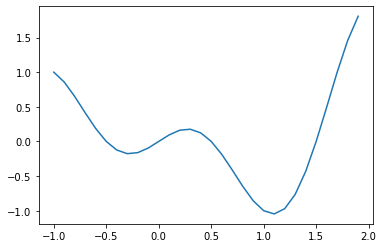

In [2]:
# define output y
def y(x):
    return x * np.cos(np.pi * x)

# define input x
x = np.arange(-1, 2.0, 0.1)

# create a figure
plt.figure()

# plot the data
plt.plot(x, y(x))

# show the figure
plt.show()

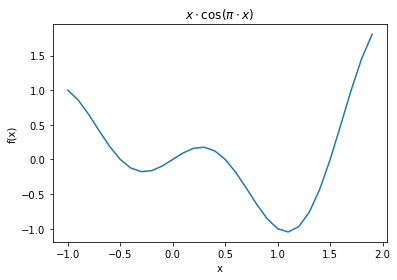

In [3]:
# Usually, we add xlabel, ylabel, and title
plt.figure()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$x \cdot \cos(\pi \cdot x)$') # you can type Latex equations between $$
plt.plot(x, y(x))
plt.show()

# Scatter plot

In [4]:

# height and weight data point
X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])

y_train = ['male'] * 4 + ['female'] * 5

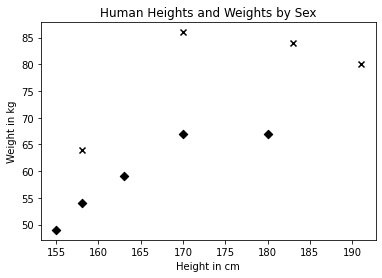

In [5]:
plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')

In [6]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
# use column 0 as the index of the dataframe
df = pd.read_csv(url, index_col=0)
df.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF
Andorra,245,138,312,12.4,EU
Angola,217,57,45,5.9,AF


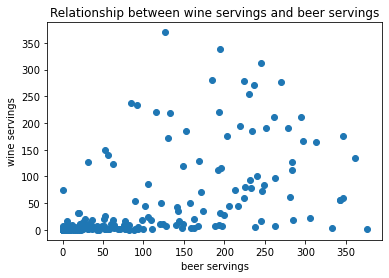

In [7]:
plt.figure()
plt.scatter(df['beer_servings'], df['wine_servings'])
plt.title("Relationship between wine servings and beer servings")
plt.xlabel("beer servings")
plt.ylabel("wine servings")
plt.show()

# Subplots

In [8]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)


y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

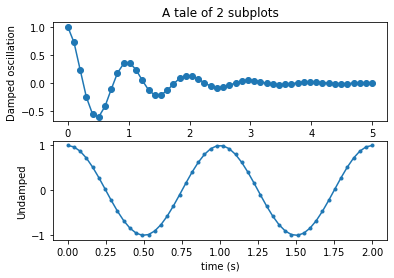

In [9]:
# define your subplots, making it 2 rows and 1 column
# subplot(# rows, #columns, index of a plot)

# first sub-plot
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

# second sub-plot
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

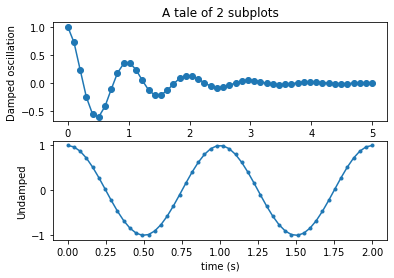

In [10]:
# Alternatively, the following code gives the same output

fig,(ax1,ax2) = plt.subplots(2,1)
ax1.set_title('A tale of 2 subplots')
ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')
ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')
plt.show()

# Axes

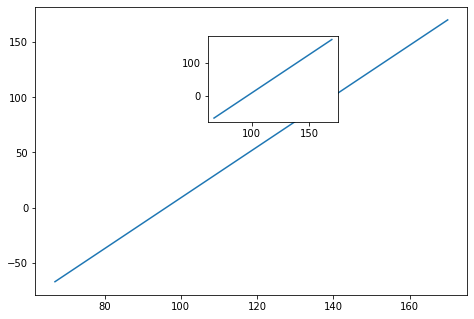

In [11]:
# axes:similar to subplot, except that you can define the locations of the plots

# [left, bottom, width, height]

a1 = plt.axes([0.1, 0.1, 1.0, 1.0])
a2 = plt.axes([0.5, 0.7, .3, .3])

a1.plot(x, y(x))
a2.plot(x, y(x))
plt.show()

# Multiple plots on the same figure

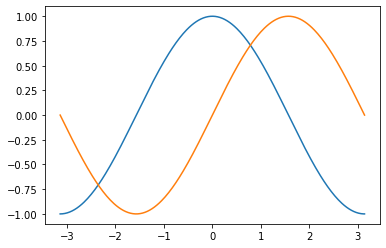

In [12]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.figure()
plt.plot(X, C)
plt.plot(X, S)
plt.show()

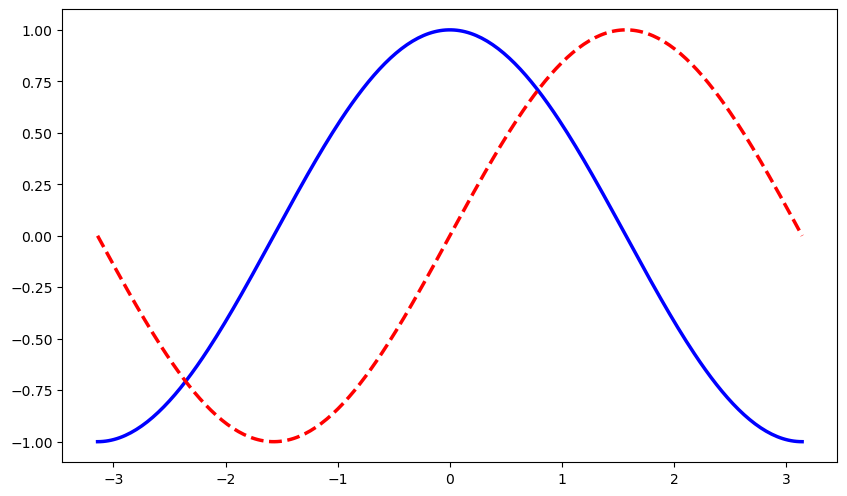

In [13]:
# make the figure bigger
plt.figure(figsize=(10, 6), dpi=100)

# define different line styles
plt.plot(X, C, color='b', linewidth=2.5, linestyle='-')
plt.plot(X, S, color='r', linewidth=2.5, linestyle='--')
plt.show()

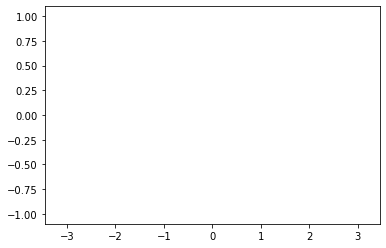

In [14]:
# set limits of x-axis and y-axis
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.show()

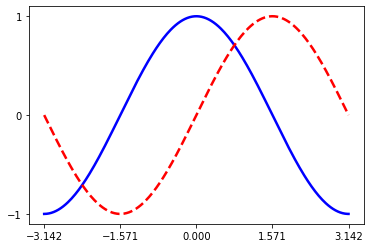

In [15]:
# set ticks for x and y axis
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])
plt.plot(X, C, color='b', linewidth=2.5, linestyle='-')
plt.plot(X, S, color='r', linewidth=2.5, linestyle='--')
plt.show()

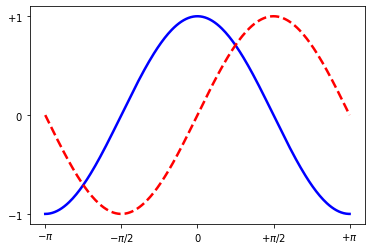

In [16]:
# set ticks and labels for x and y axis
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])

plt.plot(X, C, color='b', linewidth=2.5, linestyle='-')
plt.plot(X, S, color='r', linewidth=2.5, linestyle='--')
plt.show()

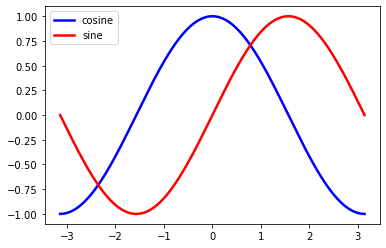

In [17]:
# add legend and ticks
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
plt.legend(loc='upper left')
plt.show()

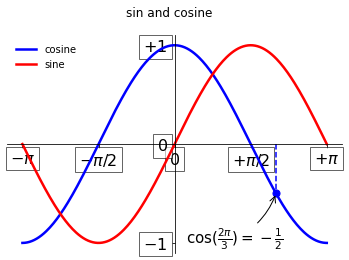

In [18]:
fig, ax = plt.subplots(1,1)
fig.suptitle('sin and cosine')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
ax.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
ax.legend(loc='upper left', frameon=False)

# set ticks and labels
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

ax.set_yticks([-1, 0, +1])
ax.set_yticklabels([r'$-1$', r'$0$', r'$+1$'])

# make tick labels more visible
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='black', alpha=0.6 ))

# ax.set_xlabel('X_value',position=(1,-0.2))
# ax.set_ylabel('Y_value',position=(-0.2,1))

# annotate some meaningful points
t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=1.5, linestyle="--")
plt.scatter([t],[np.cos(t)], 50, color ='blue')
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
                    xy=(t, np.cos(t)), xycoords='data',
                    xytext=(-90, -50), textcoords='offset points', fontsize=15,
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


plt.show()

# Exercise: (See slide 29)
1. Plot f(x) = $x \cdot \sin(x^2)$ 
2. Plot a pretty tangent line at x = a = 2.2
3. Annotate the point, show (x, y) value
4. Annotate the original line, show the formula
5. Annotate the tangent line, show the formula

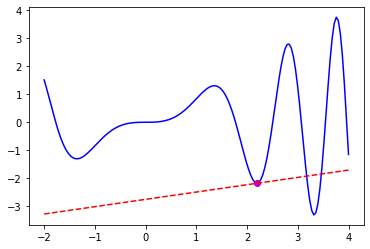

In [19]:
def f(x): # sample function
    return x*np.sin(np.power(x,2))

def tan(x, a):
    h = 0.001
    fprime = (f(a+h)-f(a))/h # derivative
    return f(a) + fprime * (x-a)
    
# evaluation of the function
x = np.linspace(-2,4,150)
y = f(x)

a = 2.2

# plot 1. the function, 2. mark the red point, and 3. plot the tangent
plt.plot(x, y, 'b',
         a, f(a), 'om', 
         x, tan(x, a=2.2),'--r')

# annotate the blue curve (TODO)

# annotate the red point (please play around the xytext to see how the text is put. default is offset = 0,0 relative to xy) TODO


# annotate the tangent line (TODO)

plt.show()

# Confusion matrix

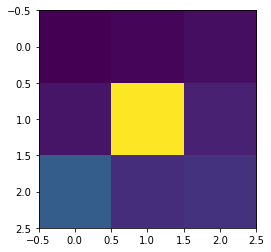

In [20]:
matrix = np.array([[1,2,3],
                   [4,55,6],
                   [17,8,9]])

plt.imshow(matrix)

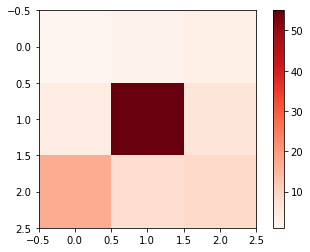

In [21]:
# select a red color for cm (stands for confusion matrix)
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.imshow(matrix, cmap=plt.cm.Reds)

# put color bars for better illustration of the values of colors
plt.colorbar()

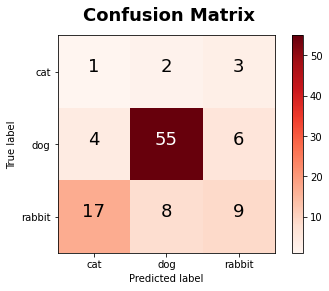

In [22]:
plt.figure()
# add the main title
plt.suptitle('Confusion Matrix',fontsize=18, fontweight='bold')
plt.imshow(matrix, cmap=plt.cm.Reds)
plt.colorbar()

# Give ticks, assuming we are classifying 3 animals
plt.xticks([0,1,2], ['cat', 'dog', 'rabbit'])
plt.yticks([0,1,2], ['cat', 'dog', 'rabbit'])

thresh = matrix.max() / 2.
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, matrix[i, j],
            horizontalalignment="center",
            fontsize=18,
            color="white" if matrix[i, j] > thresh else "black")


# add x-y labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

# Pandas plot example

In [23]:
# You can download the data from NYUclasses
housing = pd.read_csv("housing.csv", sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

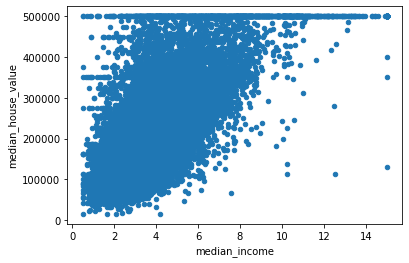

In [24]:
housing.plot.scatter(x='median_income',y='median_house_value')

# imshow + scatter

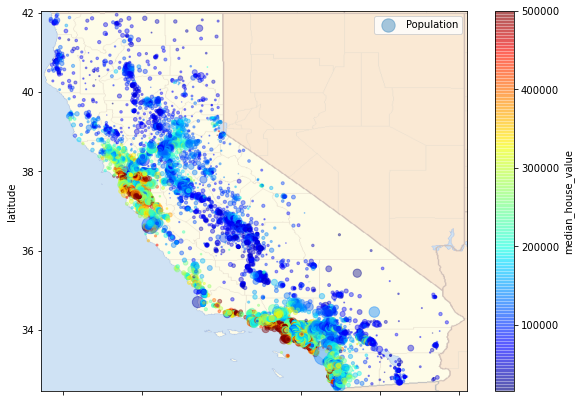

In [25]:
# visualize population density and housing price in California
import matplotlib.image as mpimg
california_img=mpimg.imread("california.png")
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,
                      )

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

# Lastly, see more plots and codes here:
https://matplotlib.org/gallery.html